## Dragon Real Estate

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Housing-data_2_.csv")

In [3]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,NaN,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       500 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['chas'].value_counts()

chas
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283320,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704819,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.620500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices =shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [12]:
print(f"Rows in train-set : {len(train_set)}\nRows in test set:{len(test_set)}\n" )

Rows in train-set : 405
Rows in test set:101



# Using SKlearn (train-test splitting)

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train-set : {len(train_set)}\nRows in test set:{len(test_set)}\n" )

Rows in train-set : 404
Rows in test set:102



In [14]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
for train_index,test_index in kf.split(housing):
    print(len(train_index),"  ",len(test_index))
 

337    169
337    169
338    168


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size =0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_test_set['chas'].value_counts()

chas
0    95
1     7
Name: count, dtype: int64

In [17]:
strat_train_set['chas'].value_counts()

chas
0    376
1     28
Name: count, dtype: int64

In [18]:
95/7

13.571428571428571

In [19]:
376/28

13.428571428571429

In [20]:
housing = strat_train_set.copy()


## Looking for Correlations

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.678080
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

array([[<Axes: xlabel='rm', ylabel='rm'>,
        <Axes: xlabel='medv', ylabel='rm'>,
        <Axes: xlabel='zn', ylabel='rm'>,
        <Axes: xlabel='lstat', ylabel='rm'>],
       [<Axes: xlabel='rm', ylabel='medv'>,
        <Axes: xlabel='medv', ylabel='medv'>,
        <Axes: xlabel='zn', ylabel='medv'>,
        <Axes: xlabel='lstat', ylabel='medv'>],
       [<Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='medv', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='lstat', ylabel='zn'>],
       [<Axes: xlabel='rm', ylabel='lstat'>,
        <Axes: xlabel='medv', ylabel='lstat'>,
        <Axes: xlabel='zn', ylabel='lstat'>,
        <Axes: xlabel='lstat', ylabel='lstat'>]], dtype=object)

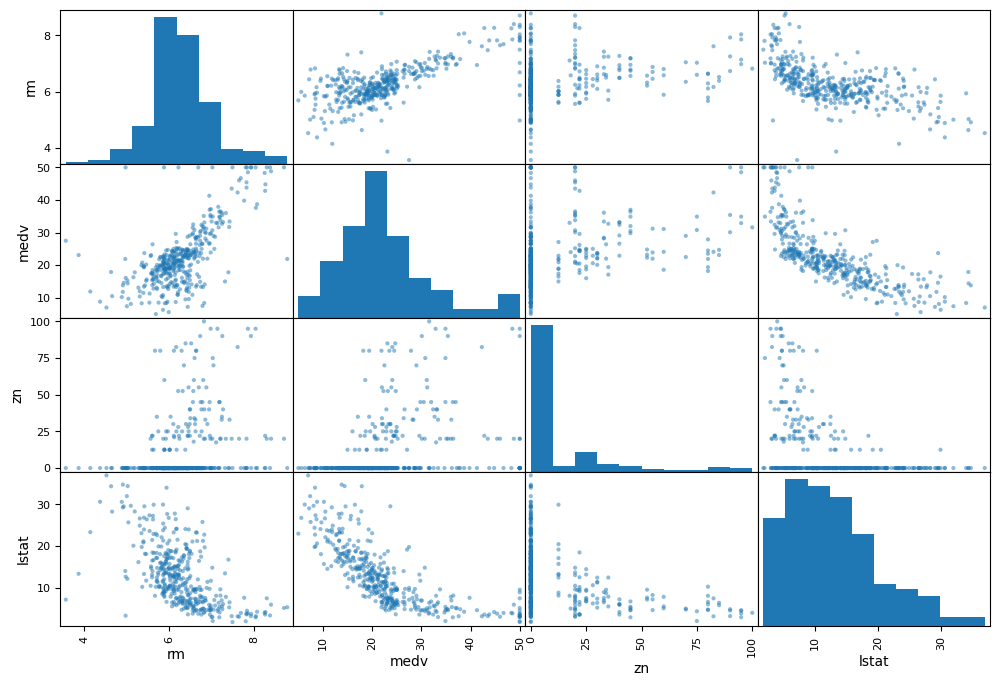

In [23]:
from pandas.plotting import scatter_matrix
attributes = ['rm','medv','zn','lstat']
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='rm', ylabel='medv'>

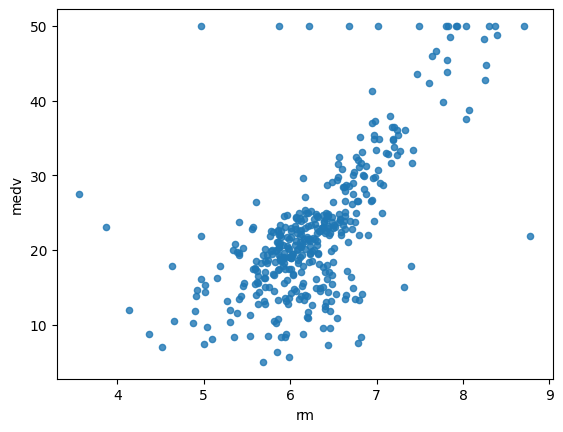

In [24]:
housing.plot(kind="scatter",x="rm", y = "medv", alpha =0.8)

## Trying out Attribute Combinations

In [25]:
housing['taxrm']=housing['tax']/housing['rm']

In [26]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,taxrm
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [27]:
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.678080
b          0.361761
zn         0.339741
dis        0.240451
chas       0.205066
age       -0.364596
rad       -0.374693
crim      -0.393715
nox       -0.422873
tax       -0.456657
indus     -0.473516
ptratio   -0.493534
lstat     -0.740494
Name: medv, dtype: float64

<Axes: xlabel='taxrm', ylabel='medv'>

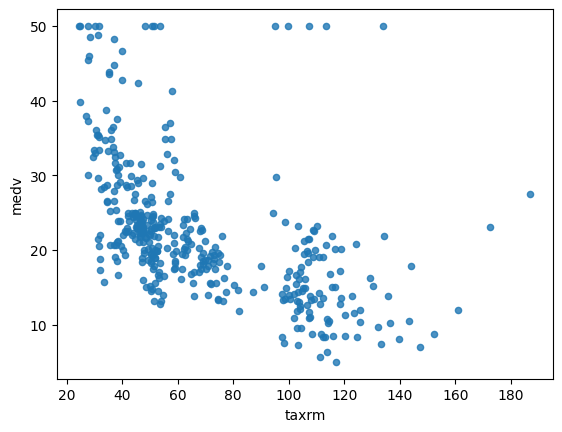

In [28]:
housing.plot(kind='scatter',x='taxrm',y='medv',alpha=0.8)

In [29]:
housing = strat_train_set.drop("medv", axis=1)
housing_labels = strat_train_set["medv"].copy()

## Missing Attributes

In [30]:
#To take care of missing attributes , you have three options :
#    1. Get rid of the missing dta points
#    2. Get rid of the whole attribute
#    3. Set the value to some value(0,missing data)


In [31]:
a= housing.dropna(subset = ['rm'])
a.shape
#original dataframe will emain unchanged

(399, 13)

In [32]:
housing.drop("rm",axis=1).shape
# No rm column and original dataframe will remain unchanged

(404, 12)

In [33]:
median= housing['rm'].median()

In [34]:
housing['rm'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [35]:
housing.shape

(404, 13)

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [38]:
X = imputer.transform(housing)

In [39]:
housing_tr= pd.DataFrame(X,columns= housing.columns)

In [40]:
housing_tr.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276554,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710714,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, 3 types of objects:
1. Estimators- It estimates some parameter based oon dataset. Eg. imputer. It has a fit method and transform method. Fit method- Fits the dataset and calculates internal paraemters

2. Transform- transform method takes input and returns output ased on the learnings form fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors- LinearRegression model is an example of predictor. fit() and predict() are two common functions . It also gives scores() function which will evaluate the predictions.


## Creating a pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    # Add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)
# print(model.coef_)
# print(model.intercept_)

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.575, 25.547, 16.29 , 23.433, 23.538])

In [49]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: medv, dtype: float64

In [50]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [52]:
rmse

1.1547526255599607

## Using better evaluation technique - Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([2.70456098, 2.72341651, 4.55654803, 2.57864361, 3.32382611,
       2.67589219, 4.72553739, 3.60154075, 3.5662288 , 3.23803705])

In [55]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:",scores.mean())
    print("Stndard deviation: ",scores.std())

In [56]:
print_scores(rmse_scores)

Scores: [2.70456098 2.72341651 4.55654803 2.57864361 3.32382611 2.67589219
 4.72553739 3.60154075 3.5662288  3.23803705]
Mean: 3.3694231429140276
Stndard deviation:  0.7297908949396497


## Saving the model

In [58]:
from joblib import dump,load
dump(model,"Dragon.jolib")

['Dragon.jolib']

## Testing the model on test data

In [62]:
X_test = strat_test_set.drop("medv",axis=1)
y_test = strat_test_set["medv"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(y_test))

[24.474 11.754 25.562 21.969 18.561 14.975 19.841 14.722 31.645 40.049
 19.847 11.7   24.523 28.305 19.547 10.601 31.918 14.303 23.603 18.965
 19.943 17.701 16.323 21.98  17.821 30.777 16.508 32.731  8.751 33.534
 23.879 21.27  23.007 10.896 20.917 11.273 42.317 24.298 23.86  41.812
 23.79  29.531 20.614 20.997 19.208 33.548 44.375 20.266 20.288 21.811
 21.272 14.713 21.321 15.227 24.828 32.738 42.555 28.567 19.381 20.943
 47.504 10.074 18.691 27.644 15.121 32.69  19.258 18.089 19.112 33.928
 27.977 22.87  21.562 22.468 35.251 12.724 15.944 20.033 21.139 21.676
 22.369 21.539 14.603 22.619 20.673 21.013 13.851 21.442 22.147 23.195
 18.874 27.566  7.186 25.748 18.654 29.756 19.749 31.338 14.603 26.922
 20.857 20.13 ] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [61]:
final_rmse

2.80349589186185

In [63]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23745606, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [66]:
from joblib import dump,load
import numpy as np
model = load("Dragon.jolib")
input = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23745606, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([22.575])